In [1]:
import pandas as pd
import re

# Read in and preprocess the data

In [2]:
script_scores = pd.read_csv ("scripts_power_and_agency.csv", sep = ',')
script_scores

,Script File,Title,Female Total,Male Total,Either Total,Female Positive Agency,Female Negative Agency,Male Positive Agency,Male Negative Agency,Either Positive Agency,Either Negative Agency,Female Power,Male Power,Either Power
0,./scriptbase titles/Wag the Dog/script.txt,Wag the Dog,25,108,89,18,0,42,21,46,18,9,38,47
1,./scriptbase titles/Machete (film)/script.txt,Machete (film),94,176,89,66,8,86,15,53,13,56,68,50
2,./scriptbase titles/Eternal Sunshine of the Sp...,Eternal Sunshine of the Spotless Mind,273,252,164,162,26,136,29,78,26,126,96,57
3,./scriptbase titles/2012 (film)/script.txt,2012 (film),199,594,498,96,20,343,74,261,111,72,274,198
4,./scriptbase titles/Super 8 (film)/script.txt,Super 8 (film),140,303,393,61,14,182,45,238,60,58,152,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,./scriptbase titles/Slumdog Millionaire/script...,Slumdog Millionaire,104,420,94,50,18,263,55,60,9,34,204,45
765,./scriptbase titles/Taking Sides (film)/script...,Taking Sides (film),51,273,237,31,2,139,59,139,19,20,129,121
766,./scriptbase titles/The Sting/script.txt,The Sting,45,472,92,18,7,256,69,55,11,17,225,42
767,./scriptbase titles/The Seventh Victim/script.txt,The Seventh Victim,148,103,31,75,14,60,17,11,4,52,42,10


In [3]:
review_scores = pd.read_csv ("reviews_power_and_agency.csv", sep = ',')
review_scores

,Review File,TT_code,Title,Female Total,Male Total,Either Total,Female Positive Agency,Female Negative Agency,Male Positive Agency,Male Negative Agency,Either Positive Agency,Either Negative Agency,Female Power,Male Power,Either Power
0,./aclImdb/test/neg/1821_4.txt,tt0138541,Judas Kiss,0,0,0,0,0,0,0,0,0,0,0,0
1,./aclImdb/test/neg/9487_1.txt,tt0202521,Passport to Paris,0,0,0,0,0,0,0,0,0,0,0,0
2,./aclImdb/test/neg/4604_4.txt,tt0417658,Factotum,0,1,0,0,0,1,0,0,0,0,0,0
3,./aclImdb/test/neg/2828_2.txt,tt0066105,The Price of Power,0,4,2,0,0,0,2,1,1,0,0,1
4,./aclImdb/test/neg/10890_1.txt,tt0787505,Rest Stop,1,3,0,0,0,2,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,./aclImdb/test/neg/11513_1.txt,tt0082183,La Chevre,0,3,1,0,0,2,1,0,1,0,3,0
12496,./aclImdb/test/neg/5409_1.txt,tt0372832,Skeleton Man,0,0,0,0,0,0,0,0,0,0,0,0
12497,./aclImdb/test/neg/11187_1.txt,tt0021577,L'Age d'Or,0,0,0,0,0,0,0,0,0,0,0,0
12498,./aclImdb/test/neg/9359_3.txt,tt0395561,States of Grace,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
script_scores.loc[:, "Title"]

0                                Wag the Dog
1                             Machete (film)
2      Eternal Sunshine of the Spotless Mind
3                                2012 (film)
4                             Super 8 (film)
                       ...                  
764                      Slumdog Millionaire
765                      Taking Sides (film)
766                                The Sting
767                       The Seventh Victim
768                             An Education
Name: Title, Length: 769, dtype: object

In [5]:
def strip_film_details(og_title):
    title = re.match("(.*) \(.*film\)", og_title)
    if title is not None:
        title = title.groups()[0]
    else:
        title = og_title
    return title

In [6]:
script_scores["Title"] = script_scores["Title"].apply(strip_film_details)
script_scores

,Script File,Title,Female Total,Male Total,Either Total,Female Positive Agency,Female Negative Agency,Male Positive Agency,Male Negative Agency,Either Positive Agency,Either Negative Agency,Female Power,Male Power,Either Power
0,./scriptbase titles/Wag the Dog/script.txt,Wag the Dog,25,108,89,18,0,42,21,46,18,9,38,47
1,./scriptbase titles/Machete (film)/script.txt,Machete,94,176,89,66,8,86,15,53,13,56,68,50
2,./scriptbase titles/Eternal Sunshine of the Sp...,Eternal Sunshine of the Spotless Mind,273,252,164,162,26,136,29,78,26,126,96,57
3,./scriptbase titles/2012 (film)/script.txt,2012,199,594,498,96,20,343,74,261,111,72,274,198
4,./scriptbase titles/Super 8 (film)/script.txt,Super 8,140,303,393,61,14,182,45,238,60,58,152,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,./scriptbase titles/Slumdog Millionaire/script...,Slumdog Millionaire,104,420,94,50,18,263,55,60,9,34,204,45
765,./scriptbase titles/Taking Sides (film)/script...,Taking Sides,51,273,237,31,2,139,59,139,19,20,129,121
766,./scriptbase titles/The Sting/script.txt,The Sting,45,472,92,18,7,256,69,55,11,17,225,42
767,./scriptbase titles/The Seventh Victim/script.txt,The Seventh Victim,148,103,31,75,14,60,17,11,4,52,42,10


In [7]:
for title in script_scores["Title"]:
    print(title)
    if title in review_scores["Title"]:
        print(title)
        

Wag the Dog
Machete
Eternal Sunshine of the Spotless Mind
2012
Super 8
National Lampoons Barely Legal
Reindeer Games
Unforgiven
Chasing Amy
Freddy vs. Jason
Alien Nation
The Goonies
I Walked with a Zombie
Romeo + Juliet
Limitless
Prometheus
Willow
The Leopard Man
Demolition Man
Nothing But a Man
Badlands
Nurse Betty
As Good as It Gets
Top Gun
Gattaca
Enemy of the State
Good Will Hunting
The Last of the Mohicans
Toy Story
The Bounty Hunter
Funny People
Wild Things
Godzilla
Superbad
Invictus
Cast Away
Heathers
Disturbia
Mrs. Brown
Face-Off
Gang Related
Sister Act
The Devils Advocate
Tin Cup
Basic Instinct
The Village
Angels & Demons
The Corruptor
Mystery Men
Pretty Woman
Thirteen Days
Rear Window
Crouching Tiger, Hidden Dragon
My Own Private Idaho
The Cell
9
Reservoir Dogs
Pariah
Wes Cravens New Nightmare
50-50
Perfect Creature
The Insider
Panic Room
Shock Treatment
Real Genius
Pi
Joe Versus the Volcano
Arctic Blue
Yes Man
Little Miss Sunshine
Clerks
Manhunter
15 Minutes
Taking Lives
Sti

In [8]:
for title in script_scores["Title"]:
    title_count=review_scores['Title'].str.contains(title).sum()
    if title_count>0:
        print ("There are {m} reviews for".format(m=title_count), title)
    if title_count == 0:
        print("There are no reviews for ", title)

There are no reviews for  Wag the Dog
There are no reviews for  Machete
There are no reviews for  Eternal Sunshine of the Spotless Mind
There are no reviews for  2012
There are no reviews for  Super 8
There are no reviews for  National Lampoons Barely Legal
There are no reviews for  Reindeer Games
There are 2 reviews for Unforgiven
There are no reviews for  Chasing Amy
There are no reviews for  Freddy vs. Jason
There are no reviews for  Alien Nation
There are no reviews for  The Goonies
There are no reviews for  I Walked with a Zombie
There are no reviews for  Romeo + Juliet
There are no reviews for  Limitless
There are no reviews for  Prometheus
There are no reviews for  Willow
There are no reviews for  The Leopard Man
There are no reviews for  Demolition Man
There are no reviews for  Nothing But a Man
There are no reviews for  Badlands
There are 5 reviews for Nurse Betty
There are no reviews for  As Good as It Gets
There are no reviews for  Top Gun
There are no reviews for  Gattaca
T

There are no reviews for  Jaws 3-D
There are no reviews for  Hider in the House
There are no reviews for  Minority Report
There are no reviews for  What Lies Beneath
There are no reviews for  Grand Hotel
There are no reviews for  Peeping Tom
There are no reviews for  RocknRolla
There are no reviews for  Simone
There are no reviews for  Coraline
There are no reviews for  Pearl Harbor
There are no reviews for  Hard Rain
There are no reviews for  Even Cowgirls Get the Blues
There are no reviews for  All the Kings Men
There are no reviews for  Bamboozled
There are no reviews for  Strange Days
There are 185 reviews for Go
There are no reviews for  Living in Oblivion
There are no reviews for  The Next Three Days
There are no reviews for  The Cider House Rules
There are no reviews for  Erin Brockovich
There are no reviews for  The Body Snatcher
There are no reviews for  The Bridges of Madison County
There are no reviews for  The Searchers
There are no reviews for  Starship Troopers
There are 

There are no reviews for  Hannah and Her Sisters
There are no reviews for  Jay and Silent Bob Strike Back
There are no reviews for  Serial Mom
There are 12 reviews for Two for the Money
There are no reviews for  Henrys Crime
There are 1 reviews for Avatar
There are no reviews for  The Abyss
There are 2 reviews for Resident Evil
There are no reviews for  Storytelling
There are no reviews for  Office Space
There are no reviews for  Analyze This
There are no reviews for  The Shawshank Redemption
There are no reviews for  The Verdict
There are no reviews for  State and Main
There are no reviews for  Three Kings
There are no reviews for  Arbitrage
There are no reviews for  Devil in a Blue Dress
There are no reviews for  Jerry Maguire
There are no reviews for  Cool Hand Luke
There are no reviews for  Smokey and the Bandit
There are no reviews for  Children of Men
There are no reviews for  Total Recall
There are 4 reviews for Eight Legged Freaks
There are 1 reviews for Donnie Darko
There are 

/Users/lexiryan/miniconda3/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


 The Butterfly Effect
There are no reviews for  Ghost World
There are no reviews for  An Officer and a Gentleman
There are 10 reviews for Chaos
There are 10 reviews for Hannibal
There are no reviews for  Oceans Twelve
There are no reviews for  Mr. Blandings Builds His Dream House
There are no reviews for  Stolen Summer
There are no reviews for  Kafka
There are no reviews for  Charade
There are no reviews for  Bull Durham
There are no reviews for  Final Destination 2
There are no reviews for  Beasts of the Southern Wild
There are 15 reviews for War of the Worlds
There are no reviews for  Starman
There are no reviews for  Game 6
There are no reviews for  The Shipping News
There are no reviews for  Sense and Sensibility
There are no reviews for  Shivers
There are no reviews for  Four Rooms
There are no reviews for  Breakdown
There are no reviews for  Arcade
There are no reviews for  Innerspace
There are 1 reviews for The Jackie Robinson Story
There are no reviews for  Code of Silence
Ther

## Average the review data within each title

In [9]:
data = {'Title':  [],
        'Female Positive Agency': [],
        'Female Negative Agency': [],
        'Male Positive Agency': [],
        'Male Negative Agency': [],
        'Either Positive Agency': [],
        'Either Negative Agency': [],
        'Female Power': [],
        'Male Power': [],
        'Either Power': []
        }

aggregate_review_scores = pd.DataFrame (data, columns = ["Title", "Female Positive Agency", "Female Negative Agency", "Male Positive Agency", "Male Negative Agency",  "Female Power", "Male Power"])

count_titles = {}
for index, row in review_scores.iterrows():
    title = row['Title']
    if title in aggregate_review_scores["Title"].unique():
        print(title)
        if title in count_titles.keys():
            count_titles[title] = count_titles[title] + 1
        else:
            count_titles[title] = 1
        title_index = aggregate_review_scores[aggregate_review_scores['Title']==title].index.item()
        aggregate_review_scores.at[title_index,'Female Positive Agency'] = aggregate_review_scores.at[title_index,'Female Positive Agency'] + row["Female Positive Agency"]
        aggregate_review_scores.at[title_index,'Male Positive Agency'] = aggregate_review_scores.at[title_index,'Male Positive Agency'] + row["Male Positive Agency"]
        aggregate_review_scores.at[title_index,'Female Negative Agency'] = aggregate_review_scores.at[title_index,'Female Negative Agency'] + row["Female Negative Agency"]
        aggregate_review_scores.at[title_index,'Male Negative Agency'] = aggregate_review_scores.at[title_index,'Male Negative Agency'] + row["Male Negative Agency"]
        aggregate_review_scores.at[title_index,'Female Power'] = aggregate_review_scores.at[title_index,'Female Power'] + row["Female Power"]
        aggregate_review_scores.at[title_index,'Male Power'] = aggregate_review_scores.at[title_index,'Male Power'] + row["Male Power"]
#         aggregate_review_scores.at[title_index,'Either Positive Agency'] = aggregate_review_scores.at[title_index,'Either Positive Agency'] + row["Either Positive Agency"]
#         aggregate_review_scores.at[title_index,'Either Negative Agency'] = aggregate_review_scores.at[title_index,'Either Negative Agency'] + row["Either Negative Agency"]
#         aggregate_review_scores.at[title_index,'Either Power'] = aggregate_review_scores.at[title_index,'Either Power'] + row["Either Power"]
        aggregate_review_scores = aggregate_review_scores.reset_index(drop=True)


        pass
    else:
#         print(row['Female Positive Agency'])
        count_titles[title] = 1
        data = {'Title':  [row['Title']],
                'Female Positive Agency': [row['Female Positive Agency']],
                'Female Negative Agency': [row['Female Negative Agency']],
                'Male Positive Agency': [row['Male Positive Agency']],
                'Male Negative Agency': [row['Male Negative Agency']],
                'Either Positive Agency': [row['Either Positive Agency']],
                'Either Negative Agency': [row['Either Negative Agency']],
                'Female Power': [row['Female Power']],
                'Male Power': [row['Male Power']],
                'Either Power': [row['Either Power']]
                }
        aggregate_review_scores = aggregate_review_scores.append(pd.DataFrame (data, columns = ["Title", "Female Positive Agency", "Female Negative Agency", "Male Positive Agency", "Male Negative Agency",  "Female Power", "Male Power"])
)
    
    
aggregate_review_scores
    

Title Not Found


/Users/lexiryan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Title Not Found
Passport to Paris
Title Not Found
I Love You Too
Title Not Found
Title Not Found
Title Not Found
Ordinary Decent Criminal
Title Not Found
Title Not Found
Title Not Found
Comanche Moon
Dracula 3000
Left Behind III: World at War
Title Not Found
Robot Holocaust
Half Past Dead
Title Not Found
Tell Me No Lies
My Boss's Daughter
The Swan Princess: The Mystery of the Enchanted Treasure
The Graffiti Artist
Title Not Found
The Book of Revelation
Title Not Found
Soul Plane
Title Not Found
Barnyard
Title Not Found
No Holds Barred
The Patriot
Ice Cream Man
American Ninja
From Venus
Jack Frost 2: Revenge of the Mutant Killer Snowman
Heart of Darkness
Title Not Found
Dark Harvest
An American Werewolf in Paris
The Giant Claw
Title Not Found
The War at Home
Navy Seals
Title Not Found
I Want Someone to Eat Cheese With
The Edge of Love
Flood
Shrieker
Sorte Nula
Title Not Found
Luther the Geek
Title Not Found
Title Not Found
Title Not Found
Night of the Blood Beast
Mr. Magoo
The Deadly Ma

Deathbed
Hatchet
Psycho
Pep Squad
Meltdown
Pulp
Bloodthirsty Butchers
The Grudge 2
Soul Plane
Greystoke
The Legend of the Lone Ranger
Title Not Found
Scarecrow Gone Wild
Love Beat the Hell Outta Me
O Crime do Padre Amaro
The Italian Job
The Magnificent Seven Ride!
Married to the Mob
Barnyard
Larger Than Life
The Pest
Eaten Alive!
Underdog
Chairman of the Board
One Dark Night
Grande école
Shark Hunter
The Love Letter
Blackwater Valley Exorcism
Vacationland
Roger & Me
Bone Eater
Caddyshack II
Title Not Found
Son of the Mask
Gilmore Girls
Clubbed
Love & Suicide
Title Not Found
Mame
The Astonished Heart
Dream of a Warrior
Shuttle
The Aztec Mummy Against the Humanoid Robot
Tycus
Sex and the City
Sex Lives of the Potato Men
Skeleton Man
Jump Cut
The Foreigner
Hero
Hell to Pay
Alien Express
The Dungeon of Harrow
I Love You Too
The Ghastly Ones
Pola X
Michael
Title Not Found
Stay Alive
Unidentified
Barney & Friends
Space Truckers
Quintet
Killing Zoe
AKA
Unidentified
Title Not Found
Hurlyburly


Evan Almighty
11:11
Hellhole Women
Christmas Vacation 2: Cousin Eddie's Island Adventure
Hellraiser: Bloodline
Delusion
Bled
Noah's Ark
The Mod Squad
Uncommon Valor
Walker, Texas Ranger
Teaching Mrs. Tingle
Addison's Wall
Porno Holocaust
Battle of the Brave
Mansfield Park
Spy Kids
Crimes of Passion
Cyber Tracker
The Patriot
The Roller Blade Seven
Golden Balls
Title Not Found
Skeleton Man
Children of the Corn
House of the Dead 2
Star Trek V: The Final Frontier
Nightbeast
Darling Lili
Far Cry
Omoo-Omoo the Shark God
Grande école
At the Earth's Core
Aliens vs. Predator: Requiem
The Foreigner
Airborne
Unidentified
Vampire Assassin
Title Not Found
Noah's Ark
Ed Gein: The Butcher of Plainfield
Naked Fame
Fur: An Imaginary Portrait of Diane Arbus
Shadow Conspiracy
Fruits of Passion
Title Not Found
Killjoy 2: Deliverance from Evil
Dark Reality
The Detonator
Jurassic Park III
Good Boy, Bad Boy
Killer Flood: The Day the Dam Broke
Solo
Paranormal State
Dial: Help
Survival Island
Nemesis Game
Rand

Accepted
Astroesque
American Ninja
Strangers with Candy
Kath & Kim
The Stupids
Sex Lives of the Potato Men
From Venus
The Man Who Skied Down Everest
Title Not Found
Stay Alive
Love Soup
Deathbed
Title Not Found
Robot Holocaust
Assassin's Creed
Curse of the Forty-Niner
The Untold
Title Not Found
Heart of Darkness
The Memory Keeper's Daughter
The Strangeness
The Toxic Avenger Part II
Gimme an 'F'
The 27th Day
The Glimmer Man
Lady and the Tramp 2: Scamp's Adventure
Wicked Little Things
Afraid of the Dark
Venom
Naqoyqatsi
Angels & Demons
Christmas Vacation 2: Cousin Eddie's Island Adventure
Title Not Found
First Snow
Aussie Park Boyz
Copying Beethoven
Kronk's New Groove
The War at Home
My Name Is Earl
The Wog Boy
Deadly Prey
Title Not Found
Zoey 101
The Hills Have Eyes
My Boss's Daughter
Star
Family Guy
Title Not Found
Croupier
Teaching Mrs. Tingle
D.O.A.
Title Not Found
Mame
Radio Flyer
Komodo vs. Cobra
The Dain Curse
2:37
Star Trek V: The Final Frontier
Electrocuting an Elephant
Angels &

Homecoming
Deathbed
Eaten Alive!
The Patriot
Alien Express
Hellbound
Bled
The Mummy's Curse
Title Not Found
The Foreigner
Comanche Moon
Hellhole Women
The Wild Rebels
Evan Almighty
Unidentified
Made for Each Other
Needful Things
Soul Plane
Bloodthirsty Butchers
Sanctimony
The Legend of the Lone Ranger
Meltdown
The Affair
Tank Girl
Road House 2: Last Call
Water
The Bone Snatcher
Undertaking Betty
Feeling Minnesota
Hell Ride
Title Not Found
Man of the Year
Love Beat the Hell Outta Me
Kadosh
Title Not Found
The Love Letter
Shark Hunter
The Women
Chairman of the Board
One Dark Night
Threat Matrix
Destination Moon
Bastard Out of Carolina
Fear and Desire
Wrath of the Ninja: The Yotoden Movie
Star Trek V: The Final Frontier
Title Not Found
Be Cool
Gilmore Girls
Chicago Cab
Never Talk to Strangers
Pep Squad
That Darn Cat
Here on Earth
Roger & Me
Title Not Found
The Ten Commandments
Virtual Sexuality
The Grudge 2
Coach of the Year
Herman U.S.A.
Spy Kids
The Deadly Mantis
Mr. Magoo
Paranoid Park

Shade
Quintet
Evan Almighty
Saw
'R Xmas
Aksar
What's Up?
Solo
The Planet
Cheerleader Massacre
Left Behind III: World at War
Flatliners
Days of Heaven
Fat Girls
Kokoda
Unforgiven
Title Not Found
The World According to Garp
Mame
Pulp
Golden Balls
Cold Mountain
Mind of Mencia
Partner
Leatherheads
Killer Flood: The Day the Dam Broke
The Dark Power
The Covenant
Jack-O
The Jackal
Crash
Snakes on a Train
The Church
When Women Had Tails
Where's Poppa?
Dark Reality
The War at Home
Dear John
Empire Falls
Granny
Distant
Sand
Shoot or Be Shot
Necessary Roughness
Law of Desire
Game Box 1.0
Leaving Las Vegas
Spooked: The Ghosts of Waverly Hills Sanatorium
The Great Dictator
House of the Dead 2
Title Not Found
Pola X
One Leg Kicking
A Prayer for the Dying
Dinner with a Vampire
The Manson Family
Title Not Found
Iron Eagle
Joy: The Real Love Story
The Foreigner
Alien Express
Assassination
Counter Measures
High Roller: The Stu Ungar Story
The Clonus Horror
L'Age d'Or
The Bone Collector
Wild Roomies
Dial

The Comebacks
Raptor
Evil Ed
Mon Oncle Antoine
The Magnificent Seven Ride!
The Prey
Dial: Help
Paranormal State
The Jackal
Motorama
Hunt for Justice
Good Boy, Bad Boy
The Mirror
Jurassic Park III
Metal Mayhem
Evil Behind You
Small Town Gay Bar
Cyclone
Today You Die
The Milpitas Monster
Naturally, Sadie
Dear Diary
Children of the Corn
Title Not Found
Larger Than Life
Slayer
In Search of America
Mercy
Sex, Politics & Cocktails
Dude, Where's My Car?
Vampire Assassin
Bruno
Tuvalu
The Toxic Avenger Part II
Title Not Found
Heartbeeps
Crash Landing
Speed
Great Balls of Fire!
Rat Race
Mirrormask
All About Me
Bundle of Joy
Blood Cult
Walker, Texas Ranger
Wild Roomies
Cyber Tracker
D.O.A.
The Roller Blade Seven
Lethal Target
Where's Poppa?
Gay Sex in the 70s
Man of the Year
Under the Lighthouse Dancing
Always
Milo
Ice Cream Man
The Egyptian
Stalingrad
Night of the Demons
North Shore
The United States of Leland
Let's Get Tough!
What's Good for the Goose
Hannibal
Beyond the Clouds
Half-Caste
Noah'

Hangmen
Con
Feeling Minnesota
Battlespace
Sappy Bull Fighters
The Seventh Scroll
Mad Dog Morgan
The Love Letter
Washington Heights
The Wind
Deuces Wild
Cyborg 2: Glass Shadow
Mind of Mencia
Slayer
Title Not Found
What's Good for the Goose
Anatomy
Checking Out
Slaughter Trail
Priceless Beauty
Be Cool
Catchfire
Abilene Town
An American Werewolf in Paris
Saboteur
Saw
Moscow Zero
Son of the Mask
The Concorde... Airport '79
The Box
Title Not Found
The Lost Tomb of Jesus
Title Not Found
The Salena Incident
Love & Suicide
Piranha
Cheerleader Massacre
Headcrusher
Malibu Spring Break
Left Behind III: World at War
Rise of the Footsoldier
The Racketeer
The Secret Life: Jeffrey Dahmer
Predator Island
Halloween: The Curse of Michael Myers
Cold Mountain
The Prey
Survival Island
The Power
Snakes on a Train
Wicked Little Things
Flight of the Conchords
Sarkar
Dark Harvest II: The Maize
Miss Castaway and the Island Girls
Blackwater Valley Exorcism
Mulholland Dr.
Friday Night Lights
The Riddle
Wassup Roc

Enigma
Chop Suey
The Last Man on Planet Earth
The 4th Floor
Time Bandits
Mercy
Dominion
Blackwater Valley Exorcism
Head of the Family
Beyond the Poseidon Adventure
Witness
The Dog Problem
Wassup Rockers
Fireworks
Leatherheads
Journey to the Far Side of the Sun
Future-Kill
Good Morning, Night
Shepherd
Venom
Predator Island
Title Not Found
Macbeth
Snakes on a Train
Oldboy
Hoosiers
Title Not Found
Cheerleader Massacre
Lost Horizon
Baise-moi
Home Improvement
Mamma Mia!
American Ninja
Kath & Kim
The Butcher of Binbrook
Vampire Assassin
The Fourth Angel
Pride & Prejudice
The Hexer
Title Not Found
Accidents Will Happen
The Untold
Not Another Teen Movie
The Buddy Holly Story
Baise-moi
Second Nature
Iron Eagle IV
Title Not Found
Commander Hamilton
Shark Hunter
A Night in Sickbay
Caddyshack II
Bells of Innocence
Cold Grip
Tomcats
Title Not Found
Desire Under the Elms
Who's That Girl
Piranha
Man in the Mirror: The Michael Jackson Story
The Quickie
Beyond Rangoon
Aussie Park Boyz
Battlespace
The G

Octopus 2: River of Fear
Forces of Nature
The Thing That Couldn't Die
Up at the Villa
Title Not Found
Atlantis: Milo's Return
The Concorde... Airport '79
Jack and the Beanstalk
The Number 23
Wicked Little Things
Harvest
Plump Fiction
El padrino
Desperate Measures
The Women
Curse of the Forty-Niner
Title Not Found
RoboCop 2
Red Sonja
Tara
Death Wish 3
Scotland, Pa.
Enchanted April
Hellhole Women
The Delivery
Soul Plane
Amityville: A New Generation
Glen or Glenda
Komodo vs. Cobra
The Net
Total Reality
War of the Worlds
Teaching Mrs. Tingle
Hangmen
The Grudge 2
Slipstream
The Ten Commandments
Icon
Strangeland
Rest Stop
Who's That Girl
Title Not Found
Title Not Found
Assault on Precinct 13
Reba
Piranha
WrestleMania IX
The Mod Squad
The Tempest
The Sailor Who Fell from Grace with the Sea
Psycho
Blonde Venus
Frostbite
The Return of the Native
Demon Wind
Space Raiders
Shutter
Dracula 3000
Flood
Crash
Northanger Abbey
Dark Harvest II: The Maize
Beyond the Poseidon Adventure
When a Stranger Cal

Chain of Command
Dracula 3000
The Fantastic Four
Son of the Mask
The Cavern
Dr. Chopper
Obaba
Critters 4
Keys to the VIP
Touch of Death
Star Trek V: The Final Frontier
Eaten Alive!
Open House
Rest Stop
Title Not Found
Bone Eater
Title Not Found
Terror in the Tropics
Brother Bear
Grandma Got Run Over by a Reindeer
Ice Cream Man
Speechless
The Messengers
Cyber Tracker
The Polar Express
Beowulf
Farewell to the King
Æon Flux
Title Not Found
The Prey
Armored
The Quick and the Undead
Water
Satanik
Illusive Tracks
Pride & Prejudice
Bells of Innocence
Hope Floats
Utopia
Dark Star
With Friends Like These...
Don Quixote
My Father the Hero
Wicked Little Things
Title Not Found
Plane Dumb
The Concorde... Airport '79
Inferno
The Gore Gore Girls
Stinger
Fat Man and Little Boy
The Hole
The Women
Title Not Found
Begotten
Title Not Found
Thank God You're Here
The Capture of Bigfoot
Komodo vs. Cobra
Kath & Kim
Dead End Road
Heaven's Gate
Gone
555
The Blade Master
Cold Grip
Bells of Innocence
Life with Mi

El padrino
From Hell It Came
The Mod Squad
Title Not Found
The Story of Mankind
Swimming with Sharks
When a Stranger Calls
Knockout
Today You Die
The War at Home
My Boss's Daughter
Milo
Last Call with Carson Daly
Title Not Found
Shadows and Fog
Title Not Found
Record
The Prey
The League of Gentlemen's Apocalypse
Zoey 101
Deceit
Title Not Found
Incident at Loch Ness
Blindfold: Acts of Obsession
Today You Die
Welcome to Sarajevo
Airborne
Unidentified
Title Not Found
iCarly
Vampire Assassin
Title Not Found
Pola X
Half Past Dead
The Island
Robot Holocaust
Anatomy
Stay Alive
Strange Fruit
Skeleton Man
Title Not Found
Hangmen
Feeling Minnesota
The Bone Snatcher
Code 46
Inuyasha
Flashdance
Grandma Got Run Over by a Reindeer
Sleeper Cell
The Last of Mrs. Cheyney
Pete's Meteor
Nightbreed
The Loop
Killshot
Dark Harvest
The Mod Squad
Gilmore Girls
Noah's Ark
Camp Fear
Enter the Devil
The Women
Frostbite
Moving McAllister
The Concorde... Airport '79
Dracula 3000
Shrieker
Flood
Crash
Dark Harvest I

Shade
Dead Space
Stalingrad
Homecoming
His Name Was Sam Walbash, But They Call Him Amen
Dante's Inferno
The Riddle
Star Trek V: The Final Frontier
2:37
The Rage: Carrie 2
Shrunken Heads
L'Age d'Or
States of Grace
Icon
Mame
Halloween: The Curse of Michael Myers
Hell Ride
Underdog
Paranormal State
Title Not Found
Partner
Speechless
Imaginary Heroes
Dei Mudder sei Gesicht
Crazy Six
American Perfekt
Son of the Mask
Code 46
Hercules
Skarecrow
Paper Bullets
Murder by Numbers
The Wedding Director
Title Not Found
Dark Harvest
Purely Belter
Frostbite
Blood and Chocolate
Smile
The Other Boleyn Girl
The Concorde... Airport '79
Volcano
Crash
Dark Harvest II: The Maize
Two Girls and a Guy
9½ Weeks
Shark Hunter
Costa!
Flesh
Armed and Dangerous
The Pest
Mind of Mencia
Hangmen
Armored
The Patriot
Bones
The Bone Snatcher
The Aztec Mummy Against the Humanoid Robot
Rolling Kansas
Miss Castaway and the Island Girls
Problem Child 2
Title Not Found
The Legend of the Lone Ranger
The Box
Grandma Got Run Over 

A Woman's a Helluva Thing
Junior
The Comebacks
Title Not Found
The War at Home
Hellbound
Title Not Found
See No Evil
Prozac Nation
Snakes on a Train
Psycho
Rush
Title Not Found
The House of Adam
The Story of Mankind
Title Not Found
Bon Voyage
Stay Alive
Kronos
Granny
Heartbeeps
Devil Fish
Unidentified
Comanche Moon
The Toxic Avenger Part II
Tender Flesh
The Best Day of My Life
Rabbit Fever
A Pyromaniac's Love Story
Mame
Paranormal State
The Prey
Mind of Mencia
Snake Island
Coronado
My Boss's Daughter
Chupacabra Terror
The Nun
The Red Right Hand
Title Not Found
Lady Frankenstein
T'aime
Moscow Zero
Granny
Killjoy 2: Deliverance from Evil
Randy Rides Alone
Evan Almighty
Beautiful People
Final Descent
Fort Doom
Zoey 101
Hercules
The Chronicle of Anna Magdalena Bach
The Brainsucker
The Picture of Dorian Gray
Dress to Kill
Angels & Demons
House of the Dead 2
Title Not Found
Komodo vs. Cobra
Living the Dream
Strange Invaders
Barney & Friends
Born
Airborne
Unidentified
A Sound of Thunder
Attac

Kevin Hill
You Kill Me
Mansfield Park
51 Birch Street
Light It Up
Ghost Train
Jurassic Park III
Miss Castaway and the Island Girls
Revolutionary Girl Utena: The Movie
The Guardian
The Patriot
Zoey 101
Hitch
The Falls
Noah's Ark
Blood Theatre
Demons 2
El Chupacabra
Virtual Sexuality
Street Fighter Alpha
T'aime
The Crazysitter
The Box
Christmas Vacation 2: Cousin Eddie's Island Adventure
MP Da Last Don
Cool and Crazy
Moscow Zero
Respiro
Cimarron
Ed Gein: The Butcher of Plainfield
Half-Caste
Enter the Ninja
Walk the Talk
Soap Girl
Black Dragons
Mrs Dalloway
Rise of the Undead
Nemesis 3: Time Lapse
Inglourious Basterds
Bullies
Girls Town
Title Not Found
Caddyshack II
The Ruins
Skeletons in the Closet
Voodoo
Backdraft
Murder in Greenwich
A Love Song for Bobby Long
Blackwater Valley Exorcism
Speechless
Big Fat Liar
My Boss's Daughter
The Comebacks
Paranormal State
Carolina Moon
Cold Hearts
Hercules
The Mummy's Ghost
2 G's & a Key
No Reservations
Air America
Undercurrent
Incident at Loch Ness

Ordinary Decent Criminal
The Cavern
Mandinga
Killers
A Christmas Tale
The Spiders - Episode 1: The Golden Sea
Piranha
The League of Gentlemen's Apocalypse
Screamers
Descent
A Farewell to Arms
Blood and Chocolate
30 Minute Meals
The Ice Pirates
Piranha
Riders of Destiny
Benji
The Rage: Carrie 2
Silver City
Welcome to Sarajevo
Love Is a Many-Splendored Thing
After Sex
Two-Fisted Tales
Caligula
Jack and the Beanstalk
Dominion
The Other Boleyn Girl
Nurse Sherri
Title Not Found
Ashes of Time
Congo
The Scarlet Pimpernel
States of Grace
Title Not Found
Star Trek V: The Final Frontier
The Women
Killshot
War of the Worlds
The Prey
A Sound of Thunder
Cold Mountain
Acacia
The Legend of Sleepy Hollow
The Invisible Circus
The Thing That Couldn't Die
Oh, God! Book II
Mother and Son
Young Warriors
Arsenal
Cult
Beastmaster 2: Through the Portal of Time
Katyn
Flatliners
Octopus 2: River of Fear
No Holds Barred
Jack-O
Title Not Found
Open House
Title Not Found
Every Breath
Posse
Wicked Little Things
Bon

'R Xmas
The Detonator
El Chupacabra
Tarzan and the Trappers
Title Not Found
The Box
Alien Express
More American Graffiti
Evan Almighty
Electra Glide in Blue
Trading Favors
The Foreigner
Barney & Friends
Title Not Found
The Devil's Men
Ghost Son
Vampire Assassin
Stay Alive
Crazy Six
Human Traffic
Zipperface
My Wife and Kids
Family Guy
Dhund: The Fog
Two Girls and a Guy
The Twins Effect
Naturally, Sadie
Skeleton Man
Caravaggio
The Loch Ness Horror
Title Not Found
The Hebrew Hammer
Blackwater Valley Exorcism
Title Not Found
Mr. Accident
Hamlet
Borderline
The Powerpuff Girls
Whispers
Speechless
The Comebacks
Strangeland
Bordertown
Wicked Little Things
The Pass
Road House
Stupid Teenagers Must Die!
Quigley
Pixel Perfect
Title Not Found
Scream Baby Scream
Ordinary Decent Criminal
Okul
No Reservations
The Hospital
Where the Heart Is
Randy Rides Alone
The Hole
Out to Sea
11:11
Jaani Dushman: Ek Anokhi Kahani
Underworld: Rise of the Lycans
Christmas Vacation 2: Cousin Eddie's Island Adventure
D

Droid Gunner
Steal This Movie
Vampires: The Turning
Mind Ripper
Quigley
Grandma's Boy
Title Not Found
Love + Hate
Pete's Meteor
Satan's Whip
Ocean's Twelve
American Buffalo
Graduation Day
Scarecrow Gone Wild
Black XXX-Mas
The Blade Master
51 Birch Street
The Biggest Loser
Love & Basketball
The Nun
The Aztec Mummy Against the Humanoid Robot
One Night at McCool's
The Stabilizer
My Name Is Earl
The Untold Story 2
The Quick and the Undead
Summer Love
The Corndog Man
The Daily Show
Jaani Dushman: Ek Anokhi Kahani
11:11
Out to Sea
Graduation Day
Aliens vs. Predator: Requiem
Christmas Vacation 2: Cousin Eddie's Island Adventure
Five Children and It
That Darn Cat
Critters 4
The Bumblebee Flies Anyway
Mad Max Beyond Thunderdome
Curse of the Forty-Niner
Soap Girl
River Queen
Here on Earth
Rest Stop
Mrs Dalloway
The Thirteenth Chair
Nurse Sherri
The Untold
Escanaba in da Moonlight
Congo
Bwana Devil
Lonesome Jim
Biohazardous
Be with Me
Back in the Day
Kadosh
Scarecrow Gone Wild
Hot Summer in Baref

Title Not Found
Granny
Killjoy 2: Deliverance from Evil
Trial by Jury
The Wog Boy
Random Hearts
The Quick and the Undead
Visions of Sugarplums
The Wedding Director
Men in Trees
Vampire Assassin
Dark Harvest
Jaani Dushman: Ek Anokhi Kahani
Terry and June
The Love Machine
The Big Broadcast of 1938
Prozac Nation
Unidentified
Airborne
Hans Christian Andersen: My Life as a Fairy Tale
More American Graffiti
Title Not Found
The Man with Bogart's Face
Homecoming
Skeleton Man
L'Age d'Or
States of Grace
Robot Holocaust


,Title,Female Positive Agency,Female Negative Agency,Male Positive Agency,Male Negative Agency,Female Power,Male Power
0,Judas Kiss,1.0,0.0,4.0,0.0,1.0,4.0
1,Passport to Paris,4.0,0.0,1.0,1.0,4.0,2.0
2,Factotum,0.0,1.0,13.0,2.0,1.0,9.0
3,The Price of Power,0.0,0.0,1.0,2.0,0.0,1.0
4,Rest Stop,51.0,17.0,19.0,5.0,37.0,16.0
...,...,...,...,...,...,...,...
2814,Frankenhooker,0.0,0.0,0.0,0.0,0.0,0.0
2815,The Other Side of Sunday,0.0,0.0,0.0,0.0,0.0,0.0
2816,Pickpocket,0.0,0.0,0.0,0.0,0.0,0.0
2817,Trail Street,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
for index, row in aggregate_review_scores.iterrows():
    title = row['Title']
    if title in count_titles.keys():
        title_index = aggregate_review_scores[aggregate_review_scores['Title']==title].index.item()
        aggregate_review_scores.at[title_index,'Female Positive Agency'] = aggregate_review_scores.at[title_index,'Female Positive Agency'] / count_titles[title]
        aggregate_review_scores.at[title_index,'Male Positive Agency'] = aggregate_review_scores.at[title_index,'Male Positive Agency'] / count_titles[title]
        aggregate_review_scores.at[title_index,'Female Negative Agency'] = aggregate_review_scores.at[title_index,'Female Negative Agency'] / count_titles[title]
        aggregate_review_scores.at[title_index,'Male Negative Agency'] = aggregate_review_scores.at[title_index,'Male Negative Agency'] / count_titles[title]
        aggregate_review_scores.at[title_index,'Female Power'] = aggregate_review_scores.at[title_index,'Female Power'] / count_titles[title]
        aggregate_review_scores.at[title_index,'Male Power'] = aggregate_review_scores.at[title_index,'Male Power'] / count_titles[title]

Judas Kiss
0
Passport to Paris
1
Factotum
2
The Price of Power
3
Rest Stop
4
One Dark Night
5
Fright Night Part 2
6
Flesh
7
Good Will Hunting
8
The Killer Is Loose
9
Con Games
10
Roger & Me
11
Dracula 3000
12
Title Not Found
13
Blood and Chocolate
14
I Love You Too
15
Son of the Mask
16
La fidélité
17
Dark Harvest
18
Camp Fear
19
Subspecies
20
Keerthi Chakra
21
The Giant Claw
22
Summer of My German Soldier
23
The Affair
24
Ordinary Decent Criminal
25
Killshot
26
Momentum
27
Hangmen
28
Soul Plane
29
Flashdance
30
Rock Star
31
WrestleMania IX
32
The 4th Floor
33
Rocketship X-M
34
Love Beat the Hell Outta Me
35
Man of the Year
36
The Body Shop
37
The Italian Job
38
The Instructor
39
Eraser
40
Luna
41
Feeling Minnesota
42
Camp Blood
43
The Magnificent Seven Ride!
44
L'humanité
45
Armored
46
Barnyard
47
Robot Holocaust
48
Shrunken Heads
49
The 9/11 Commission Report
50
Life Is Hot in Cracktown
51
Dante's Inferno
52
Guest House Paradiso
53
Stalingrad
54
The Egyptian
55
The Loch Ness Horror
5

420
Bell Witch Haunting
421
Desire Under the Elms
422
Phase IV
423
One True Thing
424
Plankton
425
Code 46
426
Backstage
427
Ghoulies IV
428
The Puffy Chair
429
When a Stranger Calls
430
Unknown Beyond
431
Never Forever
432
Deuces Wild
433
Larry King Live
434
Thirst
435
The Maze
436
2:37
437
Children of the Corn
438
Porno Holocaust
439
Saboteur
440
K2
441
The Nature of the Beast
442
The Kindred
443
Nobody
444
Freak
445
Shutter
446
Virtual Combat
447
The Sisterhood
448
War Crimes
449
Mararía
450
Legend of the Chupacabra
451
Tycus
452
My Own Country
453
Shepherd
454
One World
455
Any Gun Can Play
456
Popstar
457
Love & Suicide
458
The Salena Incident
459
Spooked: The Ghosts of Waverly Hills Sanatorium
460
Rise of the Footsoldier
461
Fat Girls
462
Sex Lives of the Potato Men
463
The Preacher
464
X Marks the Spot
465
Dirty War
466
Confirmed Dead
467
The Pebble and the Penguin
468
Nurse Betty
469
Choke
470
Princess Warrior
471
The Edge
472
Linda
473
Anything But Love
474
Happy Days
475
Blac

A Midsummer Night's Dream
887
The Adventures of Greyfriars Bobby
888
Partner
889
Battleship Potemkin
890
Heaven Can Wait
891
Cyber Tracker
892
Saturday Night Live
893
Eaten Alive!
894
Favela Rising
895
The Evil
896
What's Good for the Goose
897
Volcano
898
Wassup Rockers
899
Hellhole Women
900
Sideshow
901
Scotland, Pa.
902
Kill Me If You Can
903
The Mummy's Curse
904
Las Vegas
905
Death Machines
906
Tank Girl
907
Time Under Fire
908
Gone in the Night
909
House of the Damned
910
Oh, God! Book II
911
She's the Man
912
Kadosh
913
All the Boys Love Mandy Lane
914
At the Earth's Core
915
Saw
916
MA 2412 - Die Staatsdiener
917
Dekalog, jeden
918
The Coca-Cola Kid
919
The Adventures of Priscilla, Queen of the Desert
920
Maximum Risk
921
The One Armed Swordsmen
922
Visions of Sugarplums
923
Son in Law
924
Record
925
Killer Condom
926
Shame
927
Coronado
928
The Great Rock 'n' Roll Swindle
929
The Last Man on Planet Earth
930
Regular Lovers
931
Second String
932
The Ballad of the Sad Cafe
933
G

Manna from Heaven
1357
American Cousins
1358
Quitting
1359
The Mill on the Floss
1360
15 Park Avenue
1361
Greedy Humpty Dumpty
1362
Attack of the 50 Foot Woman
1363
Susan Slept Here
1364
Game Box 1.0
1365
The Consequences of Love
1366
The Calusari
1367
The Prey
1368
Anna and the King of Siam
1369
Panic
1370
The Black Cat
1371
With Friends Like These...
1372
Rambo
1373
Since Otar Left
1374
The Barber of Siberia
1375
The Boys Club
1376
Ladies and Gentlemen, Mr. Leonard Cohen
1377
Paper Bullets
1378
The Mayor of Hell
1379
Putting Pants on Philip
1380
Om Jai Jagadish
1381
Praying Mantis
1382
Beyond the Poseidon Adventure
1383
Summer of the Monkeys
1384
Puppet on a Chain
1385
Cuéntame
1386
Terror in the Aisles
1387
Creatures the World Forgot
1388
Future-Kill
1389
The Monster Maker
1390
Iron Eagle IV
1391
Queen Kelly
1392
Demon Wind
1393
Secret Smile
1394
Ernest Goes to Africa
1395
Chico
1396
Mi in
1397
Radio
1398
Goin' South
1399
Mom
1400
Donnie Darko
1401
Resident Evil 2
1402
Treading Wate

1741
Man Dancin'
1742
The Bare Wench Project
1743
Room Service
1744
Müllers Büro
1745
Their Purple Moment
1746
The Street
1747
Sensations of 1945
1748
Jurassic Park the Ride Trailer
1749
Cooley High
1750
Delta
1751
Coup de Grâce
1752
Teenage Space Vampires
1753
The Tiger Makes Out
1754
Hell's Angels '69
1755
The Favour, the Watch and the Very Big Fish
1756
Bowery Blitzkrieg
1757
I'm Bout It
1758
The Evil That Men Do
1759
Little Criminals
1760
Hit and Run
1761
The Magnificent Seven
1762
Little House on the Prairie
1763
Project Vampire
1764
Tender Flesh
1765
Ray
1766
Forces of Nature
1767
Man with Two Lives
1768
Trespass
1769
The Man Who Knew Too Much
1770
Dei Mudder sei Gesicht
1771
Voodoo Woman
1772
A Chinese Tall Story
1773
Which Way to the Front?
1774
Aria
1775
The Fanglys
1776
Conspiracy
1777
The End of Suburbia: Oil Depletion and the Collapse of the American Dream
1778
The Cover Girl Murders
1779
Brideless Groom
1780
The New Twenty
1781
Jekyll and Hyde... Together Again
1782
More A

Hitch
2130
The Falls
2131
Cemetery Man
2132
Bandit Queen
2133
00 Schneider - Jagd auf Nihil Baxter
2134
Stepping Out
2135
Danton
2136
The Higher Force
2137
The Last Man
2138
Rush
2139
Kevin Hill
2140
Coyote Beach
2141
To the Ends of Time
2142
Revolutionary Girl Utena: The Movie
2143
The Lyon's Den
2144
Angel-A
2145
Frenzy
2146
Depeche Mode: 101
2147
The Hospital
2148
Sex Files: Erotic Possessions
2149
Tarzan and the Trappers
2150
Eclectic Shorts by Eric Leiser
2151
Cimarron
2152
Terry and June
2153
Surprised Parties
2154
The Man with Bogart's Face
2155
Voodoo
2156
Acolytes
2157
Soap Girl
2158
Blind Date
2159
Something for the Boys
2160
Whispers
2161
Big Fat Liar
2162
The 30 Foot Bride of Candy Rock
2163
Rosemary & Thyme
2164
The Mummy's Ghost
2165
...And the Earth Did Not Swallow Him
2166
Straight-Jacket
2167
Apt.
2168
They Call Me Trinity
2169
Intimate Encounters
2170
The Story of Mankind
2171
Don Quixote
2172
Death Machine
2173
Lammbock
2174
Play Dirty
2175
Resident Evil: Survivor
21

2534
Frozen Land
2535
ScaredSacred
2536
Santa Sangre
2537
Team Spirit
2538
I Want to Marry Ryan Banks
2539
Sally Marshall Is Not an Alien
2540
Heaven's Tears
2541
Scream Baby Scream
2542
Doomsday Rock
2543
Samantha
2544
Quilombo
2545
Valley Girl
2546
Alice in Wonderland: An X-Rated Musical Fantasy
2547
Flipper
2548
Bwana Devil
2549
Killjoy
2550
Seven Dead in the Cat's Eye
2551
The Rain People
2552
Othello
2553
Wall
2554
The Dresser
2555
Mister Scoutmaster
2556
The Jazz Singer
2557
Highlander: The Animated Series
2558
Let It Be Me
2559
Electra Glide in Blue
2560
Sakuran
2561
The Decline of Western Civilization
2562
The Brothers Karamazov
2563
Mannequin
2564
A Dot and a Line
2565
Virtual Encounters 2
2566
A Bright Shining Lie
2567
Asmali konak: Hayat
2568
Zombie Gang Bangers
2569
The Hit
2570
Casualties of War
2571
Thomas Jefferson
2572
Knothole
2573
Flap
2574
Jake 2.0
2575
Silmido
2576
Crazy for Love
2577
La bandera
2578
Whispering Pages
2579
Take It to the Limit
2580
Black Emmanuelle, 

In [11]:
script_scores = script_scores.rename(columns={"Female Positive Agency": "Script Female Positive Agency", "Female Negative Agency": "Script Female Negative Agency", "Male Positive Agency": "Script Male Positive Agency", "Male Negative Agency": "Script Male Negative Agency", "Either Positive Agency": "Script Either Positive Agency", "Either Negative Agency": "Script Either Negative Agency", "Female Power": "Script Female Power", "Male Power": "Script Male Power", "Either Power": "Script Either Power", "Female Total": "Script Female Total", "Male Total": "Script Male Total", "Either Total": "Script Either Total"})
aggregate_review_scores = aggregate_review_scores.rename(columns={"Female Positive Agency": "Review Female Positive Agency", "Female Negative Agency": "Review Female Negative Agency", "Male Positive Agency": "Review Male Positive Agency", "Male Negative Agency": "Review Male Negative Agency", "Either Positive Agency": "Review Either Positive Agency", "Either Negative Agency": "Review Either Negative Agency", "Female Power": "Review Female Power", "Male Power": "Review Male Power", "Either Power": "Review Either Power", "Female Total": "Review Female Total", "Male Total": "Review Male Total", "Either Total": "Review Either Total"})



In [12]:
scripts_and_reviews = script_scores.join(aggregate_review_scores.set_index('Title'), on='Title')
pd.set_option("display.max_rows", None, "display.max_columns", None)

scripts_and_reviews = scripts_and_reviews.dropna()
scripts_and_reviews

,Script File,Title,Script Female Total,Script Male Total,Script Either Total,Script Female Positive Agency,Script Female Negative Agency,Script Male Positive Agency,Script Male Negative Agency,Script Either Positive Agency,Script Either Negative Agency,Script Female Power,Script Male Power,Script Either Power,Review Female Positive Agency,Review Female Negative Agency,Review Male Positive Agency,Review Male Negative Agency,Review Female Power,Review Male Power
7,./scriptbase titles/Unforgiven/script.txt,Unforgiven,101,387,270,50,22,195,58,160,41,45,157,129,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000
21,./scriptbase titles/Nurse Betty/script.txt,Nurse Betty,390,390,164,204,59,229,52,89,20,162,177,64,0.400000,0.400000,0.400000,0.600000,0.800000,0.600000
26,./scriptbase titles/Good Will Hunting/script.txt,Good Will Hunting,46,210,235,27,4,121,36,131,42,24,102,99,0.625000,0.125000,0.750000,0.250000,0.500000,0.625000
27,./scriptbase titles/The Last of the Mohicans (...,The Last of the Mohicans,188,336,277,80,21,169,57,147,61,65,162,124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
46,./scriptbase titles/Angels & Demons (film)/scr...,Angels & Demons,102,386,298,59,12,229,59,171,61,41,156,123,0.142857,0.000000,0.785714,0.214286,0.000000,0.857143
49,./scriptbase titles/Pretty Woman/script.txt,Pretty Woman,459,429,118,261,73,256,55,66,14,201,195,55,0.500000,0.500000,1.500000,0.500000,0.500000,0.500000
52,"./scriptbase titles/Crouching Tiger, Hidden Dr...","Crouching Tiger, Hidden Dragon",111,131,157,50,14,69,21,99,16,39,53,70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54,./scriptbase titles/The Cell/script.txt,The Cell,439,323,130,246,75,174,61,56,22,198,133,52,0.800000,0.400000,0.600000,0.000000,0.800000,0.800000
76,./scriptbase titles/Men in Black (film)/script...,Men in Black,168,307,164,110,10,203,32,95,25,98,163,79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
77,./scriptbase titles/Hellboy (film)/script.txt,Hellboy,106,360,82,53,13,218,33,48,12,45,160,34,0.000000,0.000000,0.500000,0.500000,0.000000,0.500000


How many movies had both reviews and scripts?

In [13]:
scripts_and_reviews.shape

(62, 20)

# Graphing the data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
female_power = pd.DataFrame({'height': scripts_and_reviews["Script Female Power"], 'weight': scripts_and_reviews["Review Female Power"]})

In [16]:
male_power = pd.DataFrame({'height': scripts_and_reviews["Script Male Power"], 'weight': scripts_and_reviews["Review Male Power"]})
female_pos_agency = pd.DataFrame({'height': scripts_and_reviews["Script Female Positive Agency"], 'weight': scripts_and_reviews["Review Female Positive Agency"]})
male_pos_agency = pd.DataFrame({'height': scripts_and_reviews["Script Male Positive Agency"], 'weight': scripts_and_reviews["Review Male Positive Agency"]})
female_neg_agency = pd.DataFrame({'height': scripts_and_reviews["Script Female Negative Agency"], 'weight': scripts_and_reviews["Review Female Negative Agency"]})
male_neg_agency = pd.DataFrame({'height': scripts_and_reviews["Script Male Negative Agency"], 'weight': scripts_and_reviews["Review Male Negative Agency"]})



### Plot individually

/Users/lexiryan/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/lexiryan/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


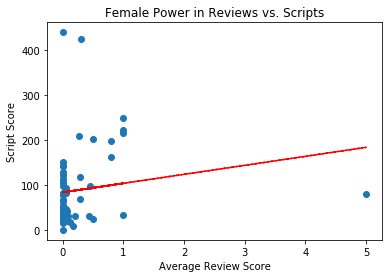

Pearson Correlation Coefficient:  0.15680526161738104 




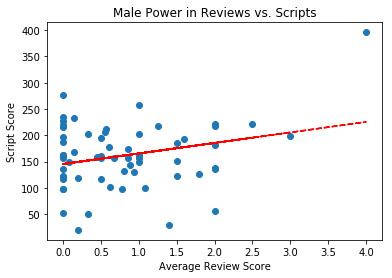

Pearson Correlation Coefficient:  0.2755949493512398 




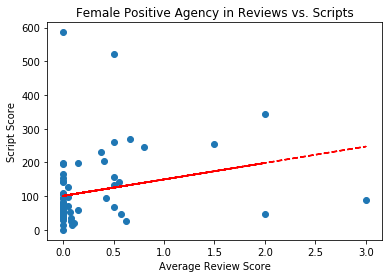

Pearson Correlation Coefficient:  0.24593921604970598 




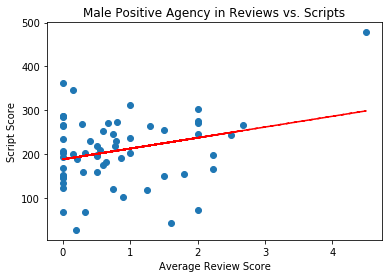

Pearson Correlation Coefficient:  0.2770073573513732 




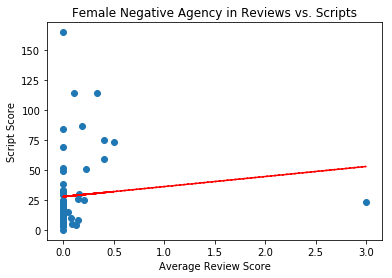

Pearson Correlation Coefficient:  0.10408641144541046 




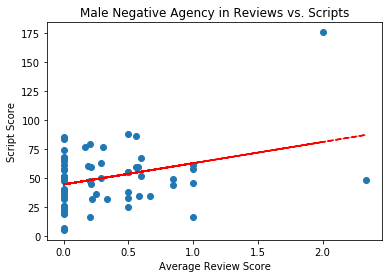

Pearson Correlation Coefficient:  0.32881464098492497 




In [17]:
x = female_power.weight
y = female_power.height
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
m, b = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel("Average Review Score")
plt.ylabel("Script Score")
plt.title('Female Power in Reviews vs. Scripts')
plt.show()
# print("Trendline slope: ", z[0])
print("Pearson Correlation Coefficient: ", x.corr(y), '\n\n')

x = male_power.weight
y = male_power.height
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel("Average Review Score")
plt.ylabel("Script Score")
plt.title('Male Power in Reviews vs. Scripts')
plt.show()
# print("Trendline slope: ", z[0])
print("Pearson Correlation Coefficient: ", x.corr(y), '\n\n')

x = female_pos_agency.weight
y = female_pos_agency.height
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel("Average Review Score")
plt.ylabel("Script Score")
plt.title('Female Positive Agency in Reviews vs. Scripts')
plt.show()
# print("Trendline slope: ", z[0])
print("Pearson Correlation Coefficient: ", x.corr(y), '\n\n')

x = male_pos_agency.weight
y = male_pos_agency.height
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel("Average Review Score")
plt.ylabel("Script Score")
plt.title('Male Positive Agency in Reviews vs. Scripts')
plt.show()
# print("Trendline slope: ", z[0])
print("Pearson Correlation Coefficient: ", x.corr(y), '\n\n')

x = female_neg_agency.weight
y = female_neg_agency.height
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel("Average Review Score")
plt.ylabel("Script Score")
plt.title('Female Negative Agency in Reviews vs. Scripts')
plt.show()
# print("Trendline slope: ", z[0])
print("Pearson Correlation Coefficient: ", x.corr(y), '\n\n')

x = male_neg_agency.weight
y = male_neg_agency.height
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel("Average Review Score")
plt.ylabel("Script Score")
plt.title('Male Negative Agency in Reviews vs. Scripts')
plt.show()
# print("Trendline slope: ", z[0])
print("Pearson Correlation Coefficient: ", x.corr(y), '\n\n')


### Plot all on one

Text(0.5, 1.0, 'Review Scores vs. Script Scores for All Connotation Frames')

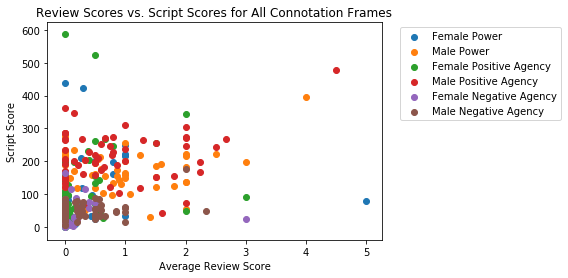

In [18]:
x = female_power.weight
y = female_power.height
plt.scatter(x,y)
x = male_power.weight
y = male_power.height
plt.scatter(x,y)
x = female_pos_agency.weight
y = female_pos_agency.height
plt.scatter(x,y)
x = male_pos_agency.weight
y = male_pos_agency.height
plt.scatter(x,y)
x = female_neg_agency.weight
y = female_neg_agency.height
plt.scatter(x,y)
x = male_neg_agency.weight
y = male_neg_agency.height
plt.scatter(x,y)
plt.xlabel("Average Review Score")
plt.ylabel("Script Score")
plt.legend(('Female Power', 'Male Power', 'Female Positive Agency', 'Male Positive Agency', 'Female Negative Agency', 'Male Negative Agency'),
           bbox_to_anchor=(1.55, 1), loc='upper right')
plt.title('Review Scores vs. Script Scores for All Connotation Frames')
